In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_path = "../GitOperations/data/Final_Report.csv"

In [61]:
data = pd.read_csv(data_path)
columns = ['Package', 'Vulnerability', 'OS', 'Package_Version', 'OS_base_name', 
           'Date_Reported', 'Date_Fixed', 'Days_For_Fix']
data = data[columns]

In [62]:
data.head(7)

,Package,Vulnerability,OS,Package_Version,OS_base_name,Date_Reported,Date_Fixed,Days_For_Fix
0,tar,CVE-2018-20482,alpine:v3.6,1.31-r0,alpine,2018-12-26,NaN,NaN
1,tar,CVE-2016-6321,alpine:v3.6,1.29-r1,alpine,2016-10-27,NaN,NaN
2,tar,CVE-2019-9923,debian:8,#MAXV#,debian,2019-01-02,NaN,NaN
3,tar,CVE-2007-4131,debian:8,1.18-2,debian,2007-08-13,NaN,NaN
4,tar,CVE-2007-4476,debian:8,1.18-1,debian,2007-08-13,NaN,NaN
5,tar,CVE-2010-0624,debian:8,1.23-1,debian,2005-12-23,2011-09-13,2090.0
6,tar,CVE-2005-2541,debian:8,#MAXV#,debian,2005-08-04,NaN,NaN


In [63]:
data.shape

(1406, 8)

In [64]:
len(data.Package.unique())

54

In [65]:
data.Package.unique()

array(['tar', 'redmine', 'python', 'yum-utils', 'vim', 'perl',
       'coreutils', 'nodejs', 'zip', 'libcap', 'tcl', 'subversion',
       'byobu', 'dpkg', 'libstdc++', 'unzip', 'npm', 'openssl', 'node',
       'gnupg2', 'ca-certificates', 'python-httplib2', 'git', 'binutils',
       'procps', 'iputils', 'jq', 'gcc', 'htop', 'wget', 'gnupg',
       'mcrypt', 'gd', 'postgresql', 'pwgen', 'gettext', 'findutils',
       'patch', 'bzip2', 'flex', 'dirmngr', 'go', 'ruby', 'exif',
       'net-tools', 'curl', 'grep', 'libgcc', 'bzr', 'runit', 'mercurial',
       'sysstat', 'bash', 'tk'], dtype=object)

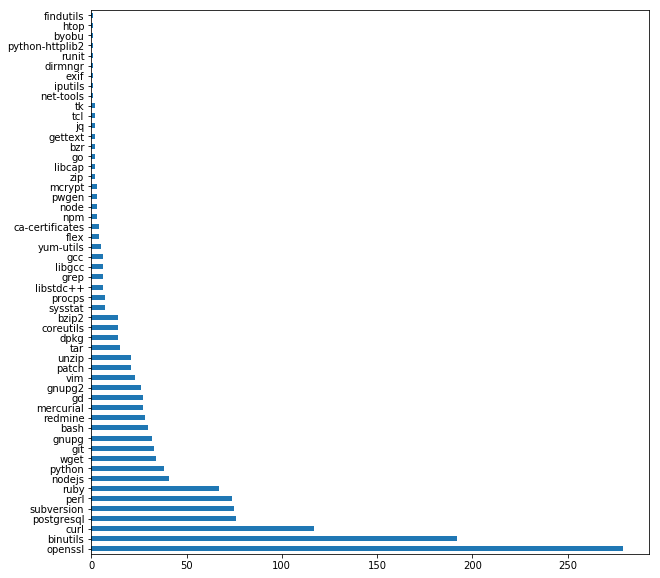

In [66]:
plt.figure(figsize=(10,10))
data.Package.value_counts().plot('barh')

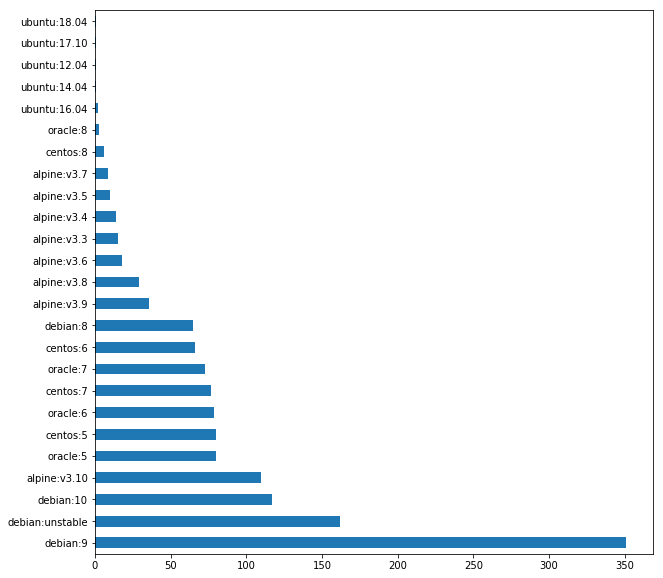

In [67]:
plt.figure(figsize=(10,10))
data.OS.value_counts().plot('barh')

In [68]:
data['OS_base_name'].value_counts('norm')

debian    0.494310
alpine    0.171408
oracle    0.167141
centos    0.162873
ubuntu    0.004267
Name: OS_base_name, dtype: float64

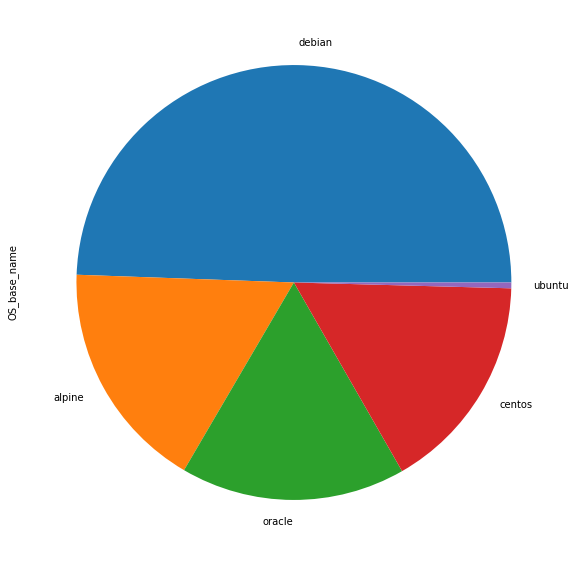

In [69]:
plt.figure(figsize=(10,10))
data['OS_base_name'].value_counts('norm').plot('pie')

In [70]:
data['Vulnerability'].unique()

array(['CVE-2018-20482', 'CVE-2016-6321', 'CVE-2019-9923', ...,
       'RHSA-2011:1073', 'ELSA-2008-0136', 'RHSA-2008:0136'], dtype=object)

In [71]:
len(data['Vulnerability'].unique())

1376

In [72]:
day_fixed_df = data[~data['Days_For_Fix'].isnull()]

In [74]:
day_fixed_df.shape

(121, 8)

In [75]:
day_fixed_df.sort_values('Days_For_Fix', ascending=False, inplace=True)

In [76]:
day_fixed_df.head()

,Package,Vulnerability,OS,Package_Version,OS_base_name,Date_Reported,Date_Fixed,Days_For_Fix
985,mcrypt,CVE-2012-4527,debian:unstable,2.6.8-1.3,debian,2012-10-18,2018-12-12,2246.0
5,tar,CVE-2010-0624,debian:8,1.23-1,debian,2005-12-23,2011-09-13,2090.0
1386,bash,CVE-2012-6711,debian:8,4.3-1,debian,2019-06-17,2014-03-05,1930.0
350,unzip,CVE-2018-18384,debian:10,6.0-11,debian,2018-10-16,2014-04-30,1630.0
188,coreutils,CVE-2017-2616,debian:unstable,8.20-1,debian,2017-03-21,2012-11-18,1584.0


In [78]:
data['OS_base_name'].unique()

array(['alpine', 'debian', 'oracle', 'centos', 'ubuntu'], dtype=object)

In [87]:
data.groupby('OS_base_name').sum().sort_values('Days_For_Fix', ascending=False)

,Days_For_Fix
OS_base_name,
debian,30362.0
ubuntu,267.0
alpine,0.0
centos,0.0
oracle,0.0


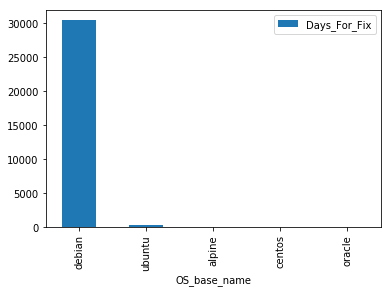

In [92]:
data.groupby('OS_base_name').sum().sort_values('Days_For_Fix', ascending=False).plot(kind='bar')

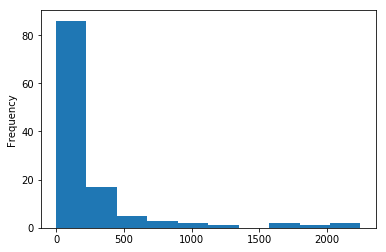

In [94]:
day_fixed_df['Days_For_Fix'][day_fixed_df['OS_base_name']=='debian'].plot('hist')